In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv('BFS_parameter_impact.csv')  

In [13]:
data = pd.read_excel('BFS_parameter_impact.xlsx')

## 1. Descriptive statistical analysis:

In [43]:
# Extract metrics of interest
metrics_of_interest = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Descriptive statistical analysis:
desc_stats = df[metrics_of_interest].describe().transpose()
desc_stats

,count,mean,std,min,25%,50%,75%,max
Node number,48.0,1566.708333,134.899956,1384.000000,1457.500000,1562.000000,1677.750000,1864.000000
Edge number,48.0,11543.791667,1831.988664,8689.000000,9457.000000,12289.000000,13099.250000,14036.000000
Coverage,48.0,0.921875,0.022316,0.886364,0.897727,0.926136,0.943182,0.948864
Avg. degree,48.0,14.658110,1.328072,12.530846,12.977688,15.479984,15.658397,15.871173
Runtime,48.0,293.143623,75.893646,203.874907,217.545583,284.948603,334.418257,503.529024


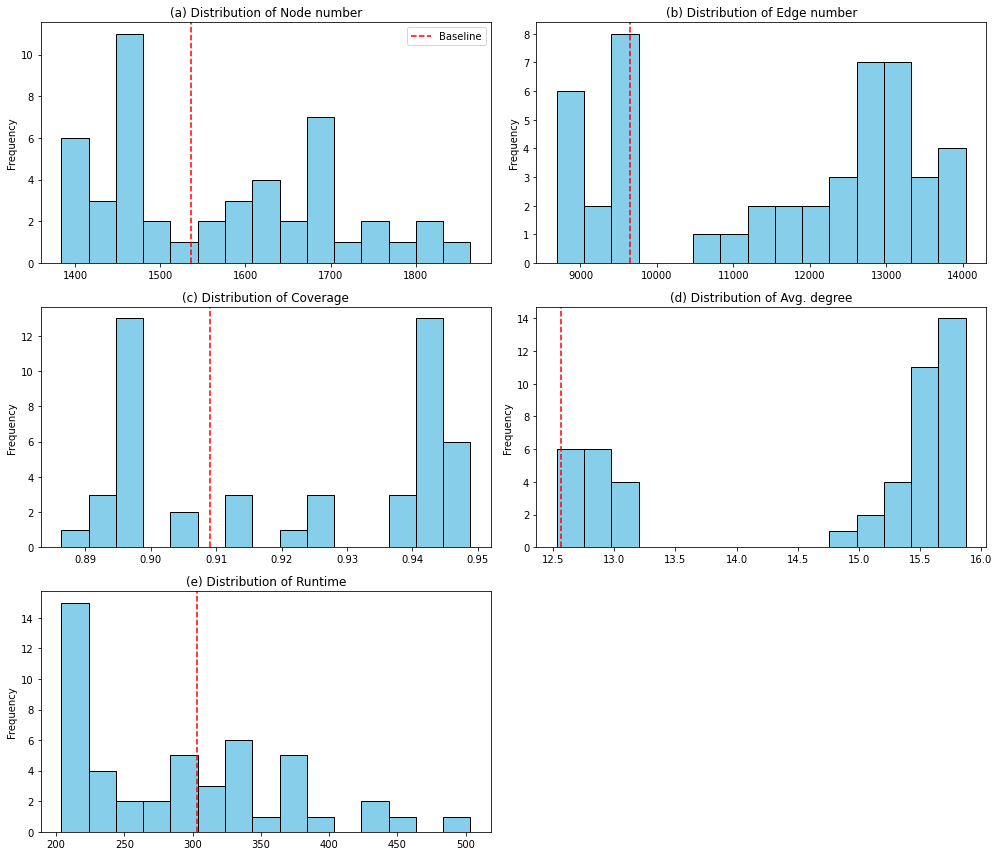

In [15]:
# Extract metrics columns for plotting
metrics_columns = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Flatten axes and delete unused ones
axes[-1].axis('off')  # hide the last (empty) subplot

# Titles
titles = [
    "(a) Distribution of Node number",
    "(b) Distribution of Edge number",
    "(c) Distribution of Coverage",
    "(d) Distribution of Avg. degree",
    "(e) Distribution of Runtime"
]

# Iterate through metrics columns and plot the distributions
for i, col in enumerate(metrics_columns):
    ax = axes[i]
    ax.hist(data[col][2:], bins=15, color='skyblue', edgecolor='black')
    ax.axvline(x=data[col][1], color='red', linestyle='--', label='Baseline')
    ax.set_title(titles[i])
    ax.set_ylabel('Frequency')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.savefig("BFS_result/png/distributions_of_evaluation_metrics_BFS.png")
plt.show()


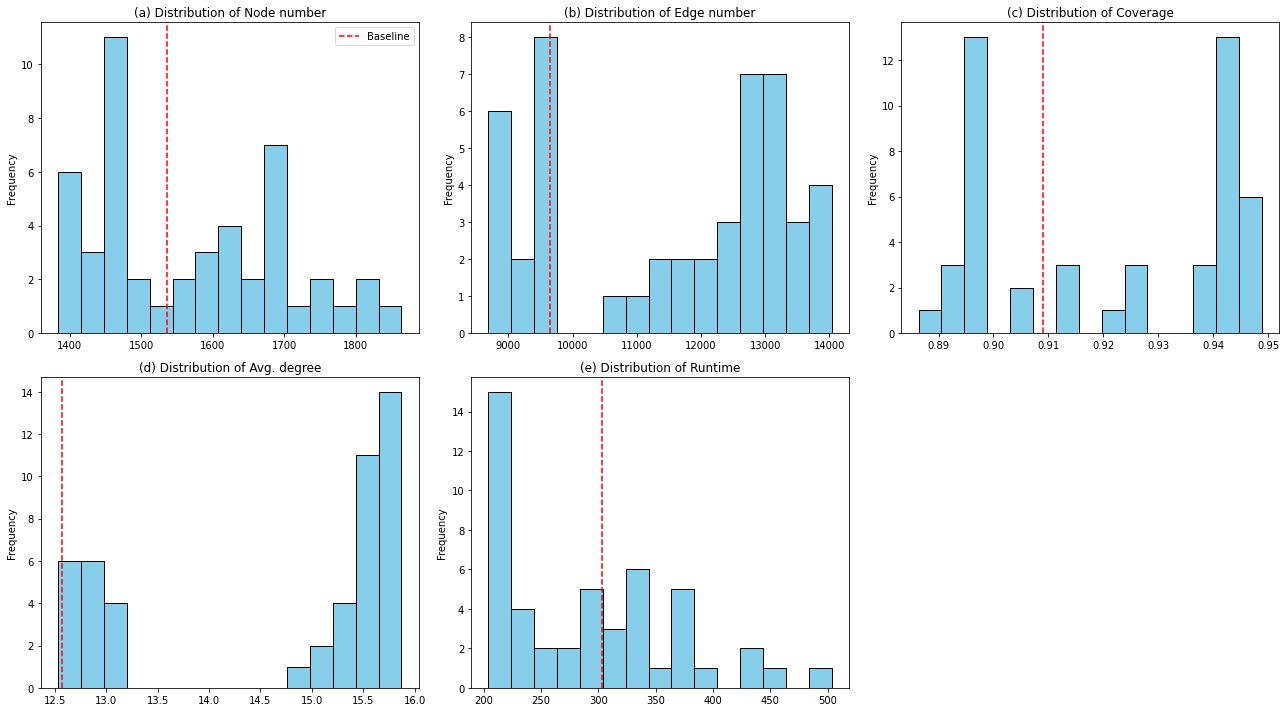

In [18]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Flatten axes and delete unused ones
axes[-1].axis('off')  # hide the last (empty) subplot

# Titles
titles = [
    "(a) Distribution of Node number",
    "(b) Distribution of Edge number",
    "(c) Distribution of Coverage",
    "(d) Distribution of Avg. degree",
    "(e) Distribution of Runtime"
]

# Iterate through metrics columns and plot the distributions
for i, col in enumerate(metrics_columns):
    ax = axes.flatten()[i]
    ax.hist(data[col][2:], bins=15, color='skyblue', edgecolor='black')
    ax.axvline(x=data[col][1], color='red', linestyle='--', label='Baseline')
    ax.set_title(titles[i])
    ax.set_ylabel('Frequency')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.savefig("BFS_result/png/distributions_of_evaluation_metrics_BFS_ppt.png")
plt.show()


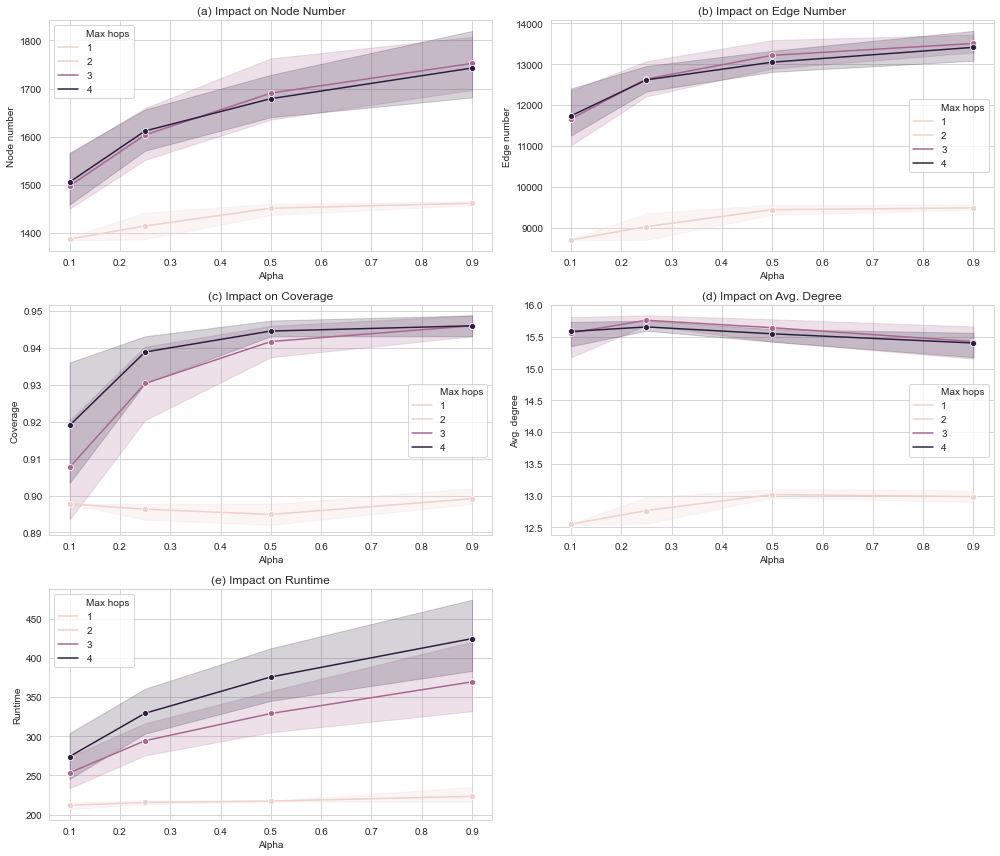

In [32]:
# Setup the aesthetic styles for the plots
sns.set_style("whitegrid")

# Extract the relevant data for analysis (excluding the first two rows: original and baseline)
analysis_data = data.iloc[2:].copy()

# Convert columns to proper data types for analysis
analysis_data["Alpha"] = pd.to_numeric(analysis_data["Alpha"], errors='coerce')
analysis_data["Beta"] = pd.to_numeric(analysis_data["Beta"], errors='coerce')
analysis_data["Max hops"] = pd.to_numeric(analysis_data["Max hops"], errors='coerce')

# Create a 3x2 grid of subplots to include Runtime vs. Alpha plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Flatten axs and delete (hide) unused ones
axs = axs.flatten()
axs[-1].axis('off')  # hide the last (empty) subplot

# Plot 1: Node number vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Node number", hue="Max hops", marker="o", ax=axs[0])
axs[0].set_title("(a) Impact on Node Number")

# Plot 2: Edge number vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Edge number", hue="Max hops", marker="o", ax=axs[1])
axs[1].set_title("(b) Impact on Edge Number")

# Plot 3: Coverage vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Coverage", hue="Max hops", marker="o", ax=axs[2])
axs[2].set_title("(c) Impact on Coverage")

# Plot 4: Avg. degree vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Avg. degree", hue="Max hops", marker="o", ax=axs[3])
axs[3].set_title("(d) Impact on Avg. Degree")

# Plot 5: Runtime vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Runtime", hue="Max hops", marker="o", ax=axs[4])
axs[4].set_title("(e) Impact on Runtime")

# Adjust layout and save
plt.tight_layout()
plt.savefig("BFS_result/png/The Parameter Impact on Evaluation Metrics (with BFS).png")
plt.show()

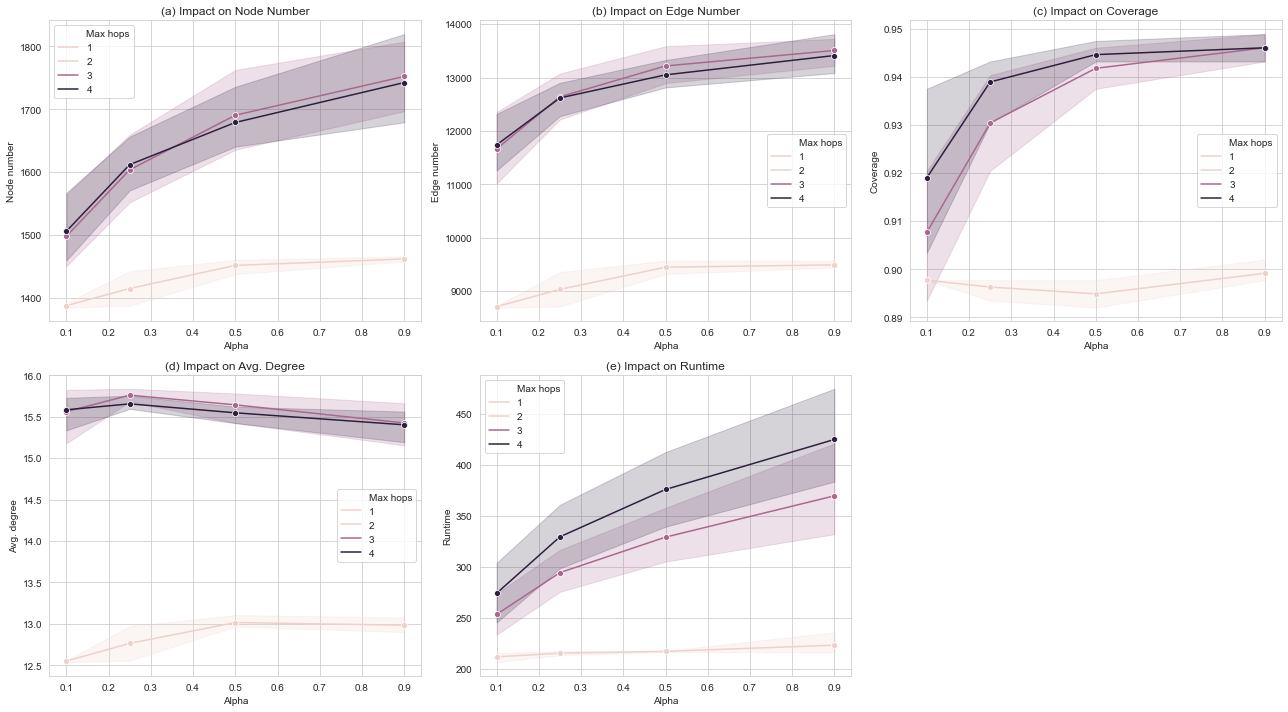

In [33]:
# Setup the aesthetic styles for the plots
sns.set_style("whitegrid")

# Extract the relevant data for analysis (excluding the first two rows: original and baseline)
analysis_data = data.iloc[2:].copy()

# Convert columns to proper data types for analysis
analysis_data["Alpha"] = pd.to_numeric(analysis_data["Alpha"], errors='coerce')
analysis_data["Beta"] = pd.to_numeric(analysis_data["Beta"], errors='coerce')
analysis_data["Max hops"] = pd.to_numeric(analysis_data["Max hops"], errors='coerce')

# Create a 3x2 grid of subplots to include Runtime vs. Alpha plot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axs and delete (hide) unused ones
axs = axs.flatten()
axs[-1].axis('off')  # hide the last (empty) subplot

# Plot 1: Node number vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Node number", hue="Max hops", marker="o", ax=axs[0])
axs[0].set_title("(a) Impact on Node Number")

# Plot 2: Edge number vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Edge number", hue="Max hops", marker="o", ax=axs[1])
axs[1].set_title("(b) Impact on Edge Number")

# Plot 3: Coverage vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Coverage", hue="Max hops", marker="o", ax=axs[2])
axs[2].set_title("(c) Impact on Coverage")

# Plot 4: Avg. degree vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Avg. degree", hue="Max hops", marker="o", ax=axs[3])
axs[3].set_title("(d) Impact on Avg. Degree")

# Plot 5: Runtime vs. Alpha, hue = Max hops
sns.lineplot(data=analysis_data, x="Alpha", y="Runtime", hue="Max hops", marker="o", ax=axs[4])
axs[4].set_title("(e) Impact on Runtime")

# Adjust layout and save
plt.tight_layout()
plt.savefig("BFS_result/png/The Parameter Impact on Evaluation Metrics ppt (with BFS).png")
plt.show()

## 2. Similarity Analysis: Use Spearman's rank correlation coefficient 

In [3]:
# Create a directory to hold the images, if the directory does not exist
if not os.path.exists("heatmaps"):
    os.mkdir("heatmaps")

parameters = ['Alpha', 'Beta', 'Max hops']

for param in parameters:
    variables_of_interest = [param, 'Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']
    
    # Calculate the Spearman's rank correlation matrix
    correlation_matrix_spearman = df[variables_of_interest].corr(method='spearman')

    # Use heatmap to show Spearman correlation
    plt.figure(figsize=(11, 6))
    sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    #plt.title(f'Spearman Correlation Heatmap for {param}')
    
    # adjust the layout
    plt.tight_layout()
    plt.subplots_adjust(left=0.15)  # Adjust left margin

    # save the image
    plt.savefig(f"heatmaps/spearman_correlation_{param}.png")
    plt.close()  # # Close the current graph to prevent repeated display


## 3. Multiple regression analysis

### Use model: OLS

In [4]:
import statsmodels.api as sm

In [5]:
# Create interaction items for Alpha, Beta, Max hops
df['Alpha_Beta'] = df['Alpha'] * df['Beta']
df['Alpha_Max_hops'] = df['Alpha'] * df['Max hops']
df['Beta_Max_hops'] = df['Beta'] * df['Max hops']

# Create list of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Build a multiple regression model for each evaluation metric and their interaction terms
model_summaries = {}
for metric in metrics:
    X = df[['Alpha', 'Beta', 'Max hops', 'Alpha_Beta', 'Alpha_Max_hops', 'Beta_Max_hops']]
    X = sm.add_constant(X)  # Add constant items
    y = df[metric]
    model = sm.OLS(y, X).fit()
    model_summaries[metric] = model.summary()

model_summaries['Node number']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Node number   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     25.39
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.39e-12
Time:                        18:48:28   Log-Likelihood:                -265.80
No. Observations:                  48   AIC:                             545.6
Df Residuals:                      41   BIC:                             558.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1223.8798    108.476     11.282      0.000    1004.807    1442.952
Alpha            -47.0585    139.971     -0.336      0.738    -329.736     235.619
Beta            9196.3657    1.4e+04      0.657      0.515   -1.91e+04    3.74e+04
Max hops         111.6239     33.434      3.339      0.002      44.103     179.145
Alpha_Beta      -982.1692   1.13e+04     -0.087      0.931   -2.39e+04    2.19e+04
Alpha_Max_hops    91.4310     38.821      2.355      0.023      13.030     169.832
Beta_Max_hops  -7800.0000   4206.302     -1.854      0.071   -1.63e+04     694.800
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   2.580
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.280
Skew:                           0.621   Prob(JB):                        0.194
Kurtosis:                       2.690   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
model_summaries['Edge number']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Edge number   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     20.18
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           8.05e-11
Time:                        18:48:28   Log-Likelihood:                -395.24
No. Observations:                  48   AIC:                             804.5
Df Residuals:                      41   BIC:                             817.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6075.8353   1608.989      3.776      0.001    2826.416    9325.254
Alpha           -455.9568   2076.135     -0.220      0.827   -4648.797    3736.884
Beta            1.027e+04   2.07e+05      0.050      0.961   -4.09e+05    4.29e+05
Max hops        1905.5171    495.911      3.842      0.000     904.005    2907.029
Alpha_Beta      1.103e+05   1.68e+05      0.655      0.516   -2.29e+05     4.5e+05
Alpha_Max_hops   468.9608    575.816      0.814      0.420    -693.924    1631.846
Beta_Max_hops  -5.495e+04   6.24e+04     -0.881      0.384   -1.81e+05    7.11e+04
==============================================================================
Omnibus:                       12.996   Durbin-Watson:                   2.816
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.398
Skew:                           0.688   Prob(JB):                       0.0408
Kurtosis:                       1.856   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model_summaries['Coverage']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Coverage   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     21.92
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.33e-11
Time:                        18:48:28   Log-Likelihood:                 149.40
No. Observations:                  48   AIC:                            -284.8
Df Residuals:                      41   BIC:                            -271.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8696      0.019     45.774      0.000       0.831       0.908
Alpha             -0.0343      0.025     -1.398      0.170      -0.084       0.015
Beta              -0.2214      2.450     -0.090      0.928      -5.169       4.726
Max hops           0.0206      0.006      3.510      0.001       0.009       0.032
Alpha_Beta         3.0819      1.986      1.552      0.128      -0.929       7.093
Alpha_Max_hops     0.0131      0.007      1.925      0.061      -0.001       0.027
Beta_Max_hops     -0.9943      0.737     -1.350      0.185      -2.482       0.493
==============================================================================
Omnibus:                        8.466   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                3.250
Skew:                           0.322   Prob(JB):                        0.197
Kurtosis:                       1.900   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model_summaries['Avg. degree']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg. degree   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.32
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.33e-10
Time:                        18:48:28   Log-Likelihood:                -49.951
No. Observations:                  48   AIC:                             113.9
Df Residuals:                      41   BIC:                             127.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.6061      1.209      8.773      0.000       8.165      13.048
Alpha              0.2590      1.560      0.166      0.869      -2.891       3.409
Beta             -86.5225    155.885     -0.555      0.582    -401.338     228.293
Max hops           1.4768      0.373      3.963      0.000       0.724       2.229
Alpha_Beta       146.4710    126.384      1.159      0.253    -108.766     401.708
Alpha_Max_hops    -0.3932      0.433     -0.909      0.369      -1.267       0.481
Beta_Max_hops      8.7797     46.878      0.187      0.852     -85.892     103.451
==============================================================================
Omnibus:                       19.172   Durbin-Watson:                   2.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.118
Skew:                           0.695   Prob(JB):                       0.0285
Kurtosis:                       1.723   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model_summaries['Runtime']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     89.91
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           5.34e-22
Time:                        18:48:28   Log-Likelihood:                -211.81
No. Observations:                  48   AIC:                             437.6
Df Residuals:                      41   BIC:                             450.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             66.5165     35.223      1.888      0.066      -4.618     137.651
Alpha            -92.4118     45.450     -2.033      0.049    -184.199      -0.624
Beta            1.375e+04   4541.821      3.028      0.004    4580.836    2.29e+04
Max hops          69.0930     10.856      6.364      0.000      47.168      91.018
Alpha_Beta     -7311.3241   3682.295     -1.986      0.054   -1.47e+04     125.221
Alpha_Max_hops    82.7926     12.605      6.568      0.000      57.335     108.250
Beta_Max_hops  -6125.4816   1365.819     -4.485      0.000   -8883.810   -3367.154
==============================================================================
Omnibus:                        5.334   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.267
Skew:                           0.551   Prob(JB):                        0.118
Kurtosis:                       3.959   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Use model: Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Create interaction items for Alpha, Beta, Max hops
df['Alpha_Beta'] = df['Alpha'] * df['Beta']
df['Alpha_Max_hops'] = df['Alpha'] * df['Max hops']
df['Beta_Max_hops'] = df['Beta'] * df['Max hops']

# define independent and dependent variables
X = df[['Alpha', 'Beta', 'Max hops', 'Alpha_Beta', 'Alpha_Max_hops', 'Beta_Max_hops']]

# Set list of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']
# Set empty result dictionary
results = {}

for metric in metrics:
    y = df[metric]
    
    # Splitting data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Evaluate model
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store values for MSE and Feature importances into result dictionary
    feature_importances = rf.feature_importances_
    #importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    #feature_importance_dict[metric] = importance_df.sort_values(by='Importance', ascending=False)
    results[metric] = {
        'MAE': mae,
        'Feature Importances': feature_importances
    }

#Reorganize the result DataFrame    
data = {
    'MAE': [results[metric]['MAE'] for metric in metrics],
    'Alpha': [results[metric]['Feature Importances'][0] for metric in metrics],
    'Beta': [results[metric]['Feature Importances'][1] for metric in metrics],
    'Max hops': [results[metric]['Feature Importances'][2] for metric in metrics],
    'Alpha_Beta': [results[metric]['Feature Importances'][3] for metric in metrics],
    'Alpha_Max_hops': [results[metric]['Feature Importances'][4] for metric in metrics],
    'Beta_Max_hops': [results[metric]['Feature Importances'][5] for metric in metrics],
}

df_results = pd.DataFrame(data, index=metrics)
df_results_transposed = df_results.T
print(df_results_transposed)


                Node number  Edge number  Coverage  Avg. degree    Runtime
MAE               43.004000   221.028000  0.003403     0.195660  16.449553
Alpha              0.086354     0.041287  0.066753     0.005618   0.042200
Beta               0.047984     0.015188  0.045883     0.002787   0.038496
Max hops           0.477697     0.858967  0.615857     0.973330   0.398184
Alpha_Beta         0.033159     0.013145  0.036784     0.004959   0.034328
Alpha_Max_hops     0.307327     0.055485  0.195776     0.010115   0.440537
Beta_Max_hops      0.047479     0.015929  0.038946     0.003191   0.046254


In [35]:
# Export to CSV
df_results_transposed.to_csv("RF_Results for multiple regression analysis (BFS).csv", index=False)

In [36]:
# Given values
mae = 221.028
min_target_variable = 8689
max_target_variable = 14036

# Calculate Relative MAE
relative_mae = mae / (max_target_variable - min_target_variable)
relative_mae, relative_mae * 100  # Also express it in percentage for better readability


(0.041336824387507014, 4.133682438750701)

## 4. Parameter optimization

In [38]:
df = pd.read_csv('BFS_parameter_impact.csv')  

In [39]:
# Define the evaluation metrics to be normalized
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Normalized
for metric in metrics:
    df[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

df.to_csv("BFS_parameter_impact_normalized.csv", index=False)

df.head()  

,Alpha,Beta,Max hops,Node number,Edge number,Density,Coverage,Avg. degree,Runtime
0,0.1,0.0025,2,0.020833,0.008416,0.004498,0.181818,0.000000,0.000000
1,0.1,0.0025,3,0.445833,0.741350,0.004958,0.636364,0.989484,0.272670
2,0.1,0.0025,4,0.452083,0.731999,0.004920,0.909091,0.961901,0.390838
3,0.1,0.0050,2,0.006250,0.003740,0.004530,0.181818,0.008141,0.036899
4,0.1,0.0050,3,0.227083,0.578829,0.005290,0.454545,0.974402,0.190203


In [55]:
# Define independent
X = df[['Alpha', 'Beta', 'Max hops']]

# Store the trained random forest model
rf_models = {}

for metric in metrics:
    y = df[metric]
    
    # Train random forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Save model
    rf_models[metric] = rf

In [57]:
#Define the optimization objective function
def objective_function(params):
    alpha, beta, max_hops = params
    
    #Use random forest model to predict various evaluation metrics
    predictions = [model.predict([[alpha, beta, max_hops]])[0] for model in rf_models.values()]
    
    # Define weights
    weights = [-0.01, -0.01, 1, 1, -0.5]
    
    # Calculate total score
    score = sum([pred * weight for pred, weight in zip(predictions, weights)])
    
    return -score  # Take a negative value here, because PSO is the minimization objective function 

# Define the parameter range
lb = [0.1, 0.0025, 2]  # The lower bound of the parameter
ub = [0.9, 0.01, 10]   # The upper bound of the parameter

# Use PSO for optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=100, maxiter=100)

print("The best parameter combination is:")
print(f"Alpha: {best_params[0]}, Beta: {best_params[1]}, Max hops: {round(best_params[2])}")


Stopping search: maximum iterations reached --> 100
The best parameter combination is:
Alpha: 0.29966078847780564, Beta: 0.004275662173360799, Max hops: 3


In [26]:
#Define the optimization objective function
def objective_function(params):
    alpha, beta, max_hops = params
    
    
    
    #Use random forest model to predict various evaluation metrics
    predictions = [model.predict([[alpha, beta, max_hops]])[0] for model in rf_models.values()]
    
    # Define weights
    weights = [-0.000001, -0.0000001, 1, 0.1, -0.0001] #The weights for unnormalized metric values
    
    # Calculate total score
    score = sum([pred * weight for pred, weight in zip(predictions, weights)])
    
    return -score  # Take a negative value here, because PSO is the minimization objective function

# Define the parameter range
lb = [0.1, 0.0025, 2]  # The lower bound of the parameter
ub = [0.9, 0.01, 10]   # The upper bound of the parameter

# Use PSO for optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=200, maxiter=200)

print("The best parameter combination is:")
print(f"Alpha: {best_params[0]}, Beta: {best_params[1]}, Max hops: {round(best_params[2])}")


Stopping search: maximum iterations reached --> 200
The best parameter combination is:
Alpha: 0.18607229810886433, Beta: 0.006035965572122319, Max hops: 3


## Creat subgraph using the optimal parameter combination

In [28]:
from rdflib import Graph, URIRef, Literal, Namespace
import networkx as nx
import pandas as pd
import time

In [29]:
from main import *
from sa_helper import *

In [30]:
# Load the graph from the input file
graph = Graph()
graph.parse('aifb_fixed_complete.nt', format="nt") #graph.parse(input_file, format=format)

<Graph identifier=N6fb862b173754ddeb4f36d14ea4d089f (<class 'rdflib.graph.Graph'>)>

In [31]:
G = nx.DiGraph()  # Create a directed graph

for s, p, o in graph:
    G.add_edge(s, o, predicate=p)

In [32]:
# Count the neighbor node number for each nodes in the graph
neighbor_counts = {node: len(list(G.neighbors(node))) for node in G.nodes()}

In [33]:
# load training and testing entities
train_df = pd.read_csv('trainingSet.tsv', sep='\t')
test_df = pd.read_csv('testSet.tsv', sep='\t')
complete_df = pd.read_csv('completeDataset.tsv', sep='\t')

train_seed_entities = train_df['person'].tolist() 
test_seed_entities = test_df['person'].tolist()
complete_seed_entities = complete_df['person'].tolist()

### Calculate the performance of the optimal parameter combination

In [36]:
# Initialize the resulting DataFrame
columns = ['Alpha', 'Beta', 'Max hops', 'Node number', 'Edge number', 'Density', 'Coverage(train)', 
           'Coverage(complete)', 'Avg. degree', 'Runtime']
results_df_op = pd.DataFrame(columns=columns)

alpha = 0.186
beta = 0.006
max_hops = 3

start_time = time.time()

subgraph = spreading_activation_BFS(graph, G, train_seed_entities, neighbor_counts, 
                                    alpha=0.186, beta=0.006, max_hops=3, extraction_threshold=0,
                                    fan_out=True, excl=True, pop=True)
G_sub = nx.DiGraph()  # Create a directed graph for the subgraph

for s, p, o in subgraph:
    G_sub.add_edge(s, o, predicate=p)

#Exhibihate the size of subgraph: The number of nodes and edges in the subgraph.
num_nodes = len(G_sub.nodes())
num_edges = len(G_sub.edges())

#Exhibihate the density of subgraph: The ratio of the number of edges to the number of nodes in the subgraph.
density = num_edges / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0

#Exhibihate the coverage(only train_seed_entities): Percentage of the seed entities that are included in the subgraph.
seed_entities_in_subgraph = [entity for entity in train_seed_entities if URIRef(entity) in G_sub.nodes()]
coverage_train = len(seed_entities_in_subgraph) / len(train_seed_entities)

#Exhibihate the coverage(complete_seed_entities): Percentage of the seed entities that are included in AIFB.
seed_entities_in_subgraph = [entity for entity in complete_seed_entities if URIRef(entity) in G_sub.nodes()]
coverage_complete = len(seed_entities_in_subgraph) / len(complete_seed_entities)

#Exhibihate the Relevance: How many of the nodes and edges in the subgraph are relevant
avg_degree = sum(dict(G_sub.degree()).values()) / num_nodes if num_nodes != 0 else 0

end_time = time.time()
runtime = end_time - start_time

# Add results to DataFrame
results_df_op = results_df_op.append({
    'Alpha': alpha,
    'Beta': beta,
    'Max hops': max_hops,
    'Node number': num_nodes,
    'Edge number': num_edges,
    'Density': density,
    'Coverage(train)': coverage_train,
    'Coverage(complete)': coverage_complete,
    'Avg. degree': avg_degree,
    'Runtime': runtime
}, ignore_index=True)
                
# Export to CSV
results_df_op.to_csv("Performance of optimal parameter combination_1.csv", index=False)

print(results_df_op)    

   Alpha   Beta  Max hops  Node number  Edge number   Density  \
0  0.186  0.006       3.0       1566.0      12455.0  0.005082   

   Coverage(train)  Coverage(complete)  Avg. degree     Runtime  
0              1.0            0.926136    15.906769  285.285478  


## 5. Visualization for the performance of the optimal parameter combination

In [37]:
import numpy as np

In [38]:
df_op = pd.read_csv('Performance of optimal parameter combination.csv')  

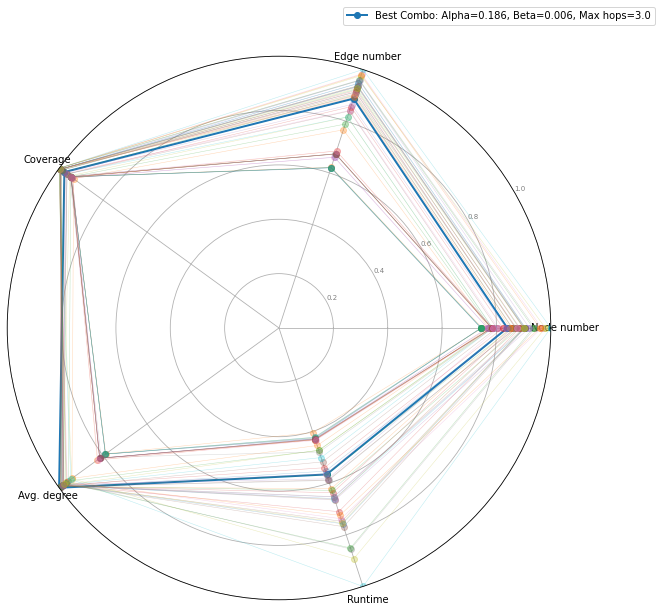

In [41]:
# List of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Get the maximum value of the evaluation index
max_values = df_op[metrics].max().values

# Data normalization
df_op_normalized = df_op[metrics] / max_values

# Set the axes of the radar/spider chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close chart

# Set the graph size
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111, polar=True)

# Plot the data
for i, row in df_op.iterrows():
    values = df_op_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]  # Close chart
    if row['Alpha'] == 0.186 and row['Beta'] == 0.006 and row['Max hops'] == 3:  # Set the optimal parameter combination
        ax.plot(angles, values, 'o-', linewidth=2, label=f"Best Combo: Alpha={row['Alpha']}, Beta={row['Beta']}, Max hops={row['Max hops']}")
    else:
        ax.plot(angles, values, 'o-', linewidth=0.5, alpha=0.3)

# Add axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_rlabel_position(30)  # Set the position of the value labels
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
plt.ylim(0, 1)

# Set legend 
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
#plt.title("Performance of Parameter Combinations")
plt.savefig("Performance of Parameter Combinations.png")
plt.show()